# Biomedical Data Science Final Project: Code for Predicting Lung Cancer (Deborah Weidman)

# Loading Data and Basic Plot

In [0]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.api as smapi
import numpy as np
import sklearn as skl
from sklearn.preprocessing import StandardScaler
import sklearn.linear_model as lm


# Read data
dat = pd.read_csv('https://raw.githubusercontent.com/dweidman1/Lung-Cancer/master/lung_cancer_examples.csv')

In [0]:
# Get columns and rows into a dataframe
smoke = dat.Smokes
result = dat.Result
age = dat.Age
alcohol = dat.Alkhol

# Print relevant data
df = dat[["Age", "Smokes", "Result"]]
df.head()

,Age,Smokes,Result
0,35,3,1
1,27,20,1
2,30,0,0
3,28,0,0
4,68,4,1


In [0]:
# Pre-processing normalization
scaler = StandardScaler()
standardized = scaler.fit_transform(df[["Age", "Smokes"]].values)
oldDf = df.copy()
df = pd.DataFrame(data = standardized, columns=["Age", "Smokes"])
df["Result"] = oldDf["Result"]

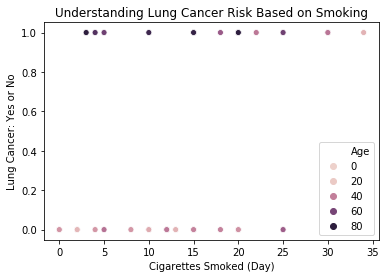

In [0]:
# Plot scatterplot of data
plt.figure()
plot = sns.scatterplot(x = "Smokes", y = "Result", data=oldDf, hue="Age")
title = plt.title('Understanding Lung Cancer Risk Based on Smoking')
xlabel = plt.xlabel('Cigarettes Smoked (Day)')
ylabel = plt.ylabel('Lung Cancer: Yes or No')

# Using StatsModel Logit Fit

In [0]:
# Add constant
smoke2 = smoke
smoke2 = smapi.add_constant(smoke2)

# Print table for interpretation
results = sm.discrete.discrete_model.Logit(result, smoke2).fit()
print(results.summary2())

Optimization terminated successfully.
         Current function value: 0.617237
         Iterations 5
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.108    
Dependent Variable: Result           AIC:              76.8339  
Date:               2019-10-07 02:05 BIC:              80.9890  
No. Observations:   59               Log-Likelihood:   -36.417  
Df Model:           1                LL-Null:          -40.819  
Df Residuals:       57               LLR p-value:      0.0030044
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5.0000                                      
------------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
------------------------------------------------------------------
const    -1.7627     0.6906   -2.5522   0.0107   -3.1163   -0.4090
Smokes    0.1085     0.0405    2.6827   0.0073    0.0292    0.1878



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Pick 75% for training data
trainfract = .75
sample = np.random.uniform(size = 59) < trainfract
traindat = dat[sample]
testdat = dat[~sample]

# Select columns/rows
X = dat[['Smokes']]
Y = dat[['Result']]

# Add constant
X = sm.tools.add_constant(X)

# Select data
xtrain = X[sample]
xtest = X[~sample]
ytrain = Y[sample]
ytest = Y[~sample]

# Predict probability of admission
prediction = results.predict(xtest)
fpr, tpr, threshold = skl.metrics.roc_curve(ytest, prediction)
specificity = 1-fpr
admin = skl.metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Text(0.5, 0, 'accuracy')

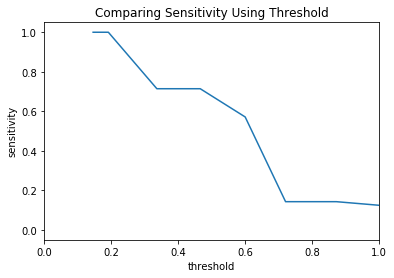

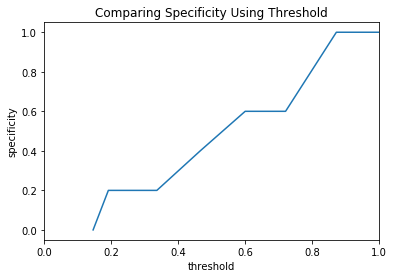

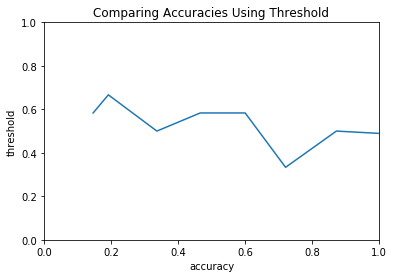

In [0]:
# Plot 1: Sensitivity
plt.figure()
plt.plot(threshold,tpr)
plt.xlim([0,1])
plt.ylabel('sensitivity')
plt.xlabel('threshold')
plt.title('Comparing Sensitivity Using Threshold')

# Plot 2: Specificity
plt.figure()
plt.plot(threshold,specificity)
plt.xlim([0,1])
plt.ylabel('specificity')
plt.xlabel('threshold')
plt.title('Comparing Specificity Using Threshold')

# Plot 3: Accuracy
pred_thres = np.array(prediction)
ytest_thres = np.array(ytest)

pred_acc = np.zeros(len(ytest_thres))
acc = np.zeros(len(threshold))

for i in range(len(threshold)):
  t = threshold[i]
  accuracy = 0
  for j in range(len(pred_thres)):
    if pred_thres[j] >= t:
      pred_acc[j] = 1
    if pred_acc[j] == ytest_thres[j]:
      accuracy += 1
  acc[i] = accuracy/len(pred_thres)

plt.figure()
plt.title('Comparing Accuracies Using Threshold')
plt.plot(threshold,acc)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('threshold')
plt.xlabel('accuracy')

# Using Seaborn

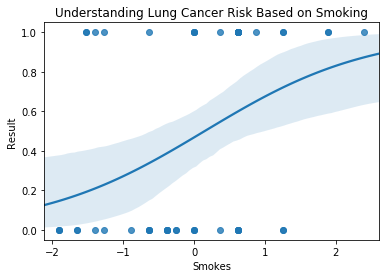

In [0]:
# Regression using normalized data
plt.figure()
plot = sns.regplot(x = "Smokes (Day)", y = "Result", data=df, logistic=True)
title = plt.title('Understanding Lung Cancer Risk Based on Smoking')

# Using Sci-Kit Learn Linear Logisitic Regression

Beta 0 is the constant -1.7598974434638797
Beta 1 is coefficient of the x variable 0.10836674413513793


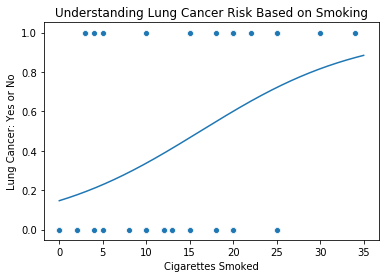

In [0]:
# using linear logisitic regression
smoke_array = np.array(smoke)
result_array = np.array(result)

lr = lm.LogisticRegression(fit_intercept=True, solver='lbfgs')
fit = lr.fit(smoke_array.reshape(-1,1), result_array)

beta0, beta1 = [fit.intercept_[0], fit.coef_[0][0]]
[beta0, beta1]

n = 1000
xplot = np.linspace(0, 35, n)
eta = beta0 + beta1 * xplot
p = 1 / (1 + np.exp(-eta))

plt.figure()
plot = sns.scatterplot(smoke, result)
plot = sns.lineplot(xplot, p)
title = plt.title('Understanding Lung Cancer Risk Based on Smoking')
xlabel = plt.xlabel('Cigarettes Smoked (Day)')
ylabel = plt.ylabel('Lung Cancer: Yes or No')

print('Beta 0 is the constant', beta0)
print('Beta 1 is coefficient of the x variable', beta1)